## Импортируем нужные библиотеки

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Загружаем данные

In [2]:
data = pd.DataFrame([[1,1,0],
                     [1,0,1],
                     [0,1,1],
                     [0,0,0]], columns=['p_1','p_2','target'])
data.head()

,p_1,p_2,target
0,1,1,0
1,1,0,1
2,0,1,1
3,0,0,0


## Функция для отрисовки граници разделения классов

In [3]:
def plot_ex(df, name_x1, name_x2, fun):
    x_min, x_max = df[name_x1].min() - .5, df[name_x1].max() + .5
    y_min, y_max = df[name_x2].min() - .5, df[name_x2].max() + .5

    h = .02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = fun(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(7,7))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Pastel1)

    sns.scatterplot(x=df[name_x1], y=df[name_x2], hue=df['target'], palette=['#00aa00','#0000ff'])
    plt.xlabel(name_x1)
    plt.ylabel(name_x2)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

## Подберем параметры модели

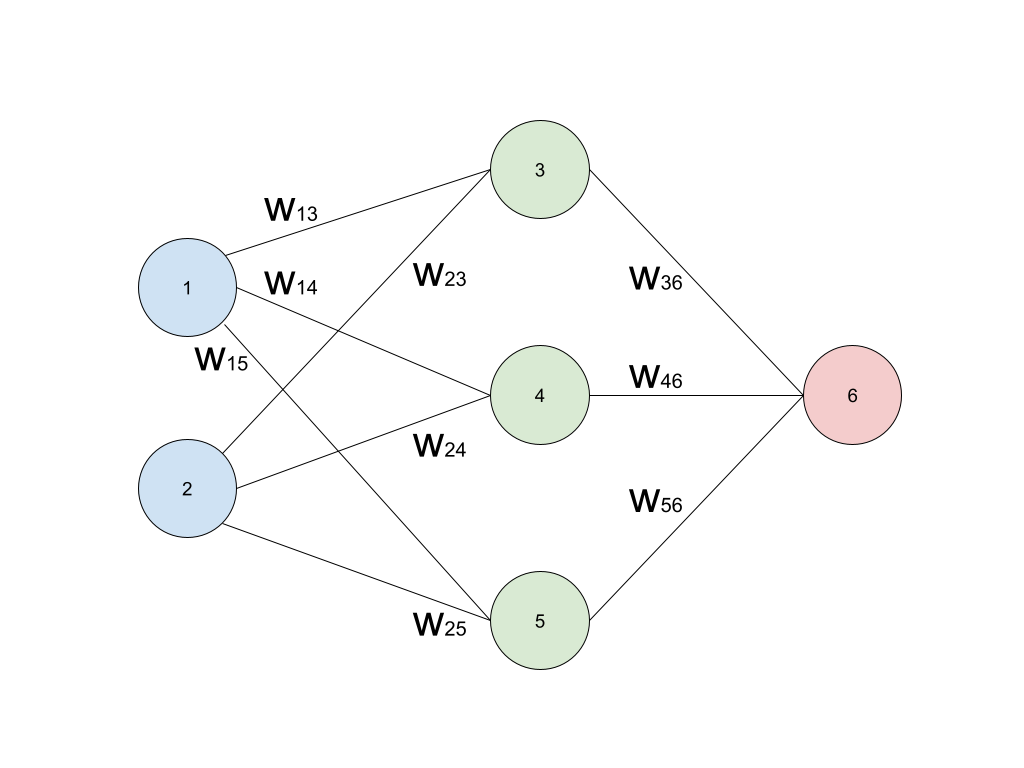


### Модель
Модель состоит извходного слоя с двумя входами, так как у нас всего 2 признака, из промежуточного слоя из трех нейронов и выходного слоя с одним нейроном.

Для промежуточного слоя значения определяются формулами

$f_3 = w_{13} x_1 + w_{23} x_2 + b_3$

$f_4 = w_{14} x_1 + w_{24} x_2 + b_4$

$f_5 = w_{15} x_1 + w_{25} x_2 + b_5$

Функция активация на промежуточных нейронах пороговая

\begin{align}
    porog(x) = \left\{
      \begin{array}{cl}
        0 & x \le 0 \\
        1 & x > 0.
      \end{array}
    \right.
\end{align}
Выходой нейрон 

$f_6 = w_{36} f_3 + w_{46} f_4 + w_{56} f_5 + b_6$

Функция активация на выходе - сигмоида

$sigmoida(x) = \frac{1}{1+e^{-x}}$

Порог для принятия решения о том, что объект относится к 1 классу равен 0.5

Итог:

$f_3 = porog(w_{13} x_1 + w_{23} x_2 + b_3)$

$f_4 = porog(w_{14} x_1 + w_{24} x_2 + b_4)$

$f_5 = porog(w_{15} x_1 + w_{25} x_2 + b_5)$

$f(x_1,x_2) = sigmoida(w_{36} f_3 + w_{46} f_4 + w_{56} f_5 + b_6)$

Задача в том, чтобы подобрать такие 

$w_{13}$, $w_{14}$, $w_{15}$, $w_{23}$, $w_{24}$, $w_{25}$, $w_{36}$, $w_{46}$, $w_{56}$, $b_3$, $b_4$, $b_5$ 

что бы модель давала верный прогноз по всем случаям

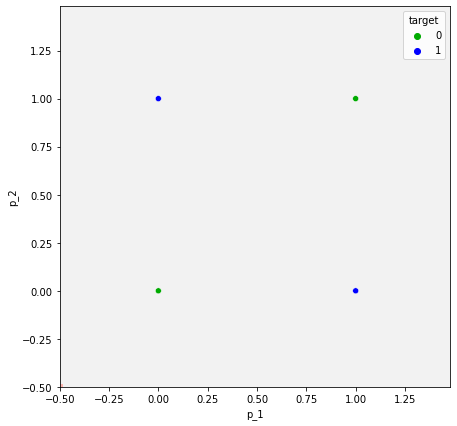

Доля верных ответов: 0.5


,p_1,p_2,target,pred
0,1,1,0,1
1,1,0,1,1
2,0,1,1,1
3,0,0,0,1


In [8]:
# Подбираем значения параметров модели
# =====================
w13 = 1
w14 = 1
w15 = 1
w23 = 1
w24 = 1
w25 = 1
b3 = 1
b4 = 1
b5 = 1
w36 = 1
w46 = 1
w56 = 1
# =====================

# функция описывающая работу нашей модели 
# здесь х это массив пар значений признаков
# вида [[0.1, 0.2]
#      [1.3, 3.1]
#      [2.1, 1.2]
#      ...       ]

def sigmoida(x):
    return 1/(1+np.exp(-x))

def porog(x):
    return (x>0)*1

def f(x): 
    f3 = porog(w13*x[:,0]+w23*x[:,1]+b3)
    f4 = porog(w14*x[:,0]+w24*x[:,1]+b4)
    f5 = porog(w15*x[:,0]+w25*x[:,1]+b5)
    f6 = w36*f3+w46*f4+w56*f5 
    res = sigmoida(f6)
    return  (res>0.5)*1

# Сделаем прогноз 
data['pred'] = f(data[['p_1','p_2']].to_numpy())

# Нарисуем границу разделения классов и выведем результат предсказания
plot_ex(data, 'p_1', 'p_2', f)
print(f"Доля верных ответов: {sum(data['target'] == data['pred'])/data.shape[0]}")
data